In [121]:
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns
#!pip install pingouin
import pingouin as pg
import pandas as pd
import numpy as np
import seaborn as sns

In [122]:
df = pd.read_csv('./Cholesterol_R.csv', index_col=0)


In [123]:
len(df)

18

In [124]:
df.head(3)

,Before,After4weeks,After8weeks,Margarine
ID,,,,
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,A
3,6.56,5.83,5.71,B


In [126]:
# Create a dataframe
n=6
newdf = pd.DataFrame({'Scores': np.r_[df['After4weeks'],df['After8weeks']]})
len(newdf)

36

In [127]:
newdf['Group'] = np.where(newdf.index % 2, 'A', 'B')

In [128]:
newdf.head()

,Scores,Group
0,5.83,B
1,6.20,A
2,5.83,B
3,4.27,A
4,7.71,B


In [129]:
newdf['Time'] = np.where(newdf.index % 3, 'August', 'June')

In [130]:
newdf.insert(3, 'Subject', range(0, 0 + len(newdf)))

In [131]:
newdf.head()

,Scores,Group,Time,Subject
0,5.83,B,June,0
1,6.20,A,August,1
2,5.83,B,August,2
3,4.27,A,June,3
4,7.71,B,August,4


In [132]:
newdf.head()

,Scores,Group,Time,Subject
0,5.83,B,June,0
1,6.20,A,August,1
2,5.83,B,August,2
3,4.27,A,June,3
4,7.71,B,August,4


<AxesSubplot:xlabel='Time', ylabel='Scores'>

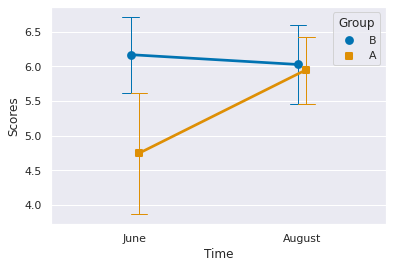

In [134]:
sns.set()
sns.pointplot(data=newdf, x=newdf['Time'], y=newdf['Scores'], hue=newdf['Group'], dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [135]:
newdf.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std']).round(2)

mean   std
Time   Group            
August A      5.95  0.95
       B      6.02  1.08
June   A      4.74  1.26
       B      6.17  0.79

In [136]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=newdf)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc     np2      eps
-----------  -----  -----  -----  -----  ------  -------  ------  -------
Group        2.470      1     22  2.470   0.664    0.424   0.029  nan
Time         2.261      1     22  2.261  -1.036    1.000  -0.049    1.000
Interaction  3.627      1     22  3.627  -1.662    1.000  -0.082  nan



/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:8525: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
